# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, chi2, skewtest, kurtosistest
import warnings
warnings.filterwarnings('ignore')
import sys
import io

# Установка кодировки вывода
sys.stdout = io.TextIOWrapper(sys.stdout.buffer, encoding='utf-8')

# Настройка стиля графиков
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# =============================================================================
# ШАГ 0: ЗАГРУЗКА ДАННЫХ И ПОДГОТОВКА
# =============================================================================

print("=" * 60)
print("ЛАБОРАТОРНАЯ РАБОТА №1")
print("=" * 60)

# Загрузка данных
try:
    df = pd.read_csv('teen_phone_addiction_dataset.csv')
    print("✓ Данные успешно загружены")
except FileNotFoundError:
    print("✗ Файл не найден! Убедитесь, что путь правильный")
    exit()

# Просмотр структуры данных
print(f"\nРазмер датасета: {df.shape}")
print(f"\nПервые 5 строк:")
print(df.head())
print(f"\nИнформация о данных:")
print(df.info())
print(f"\nОписательная статистика:")
print(df.describe())

# Определяем номер столбца для анализа (N = 0)
N = 14
columns_list = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 
                'Screen_Time_Before_Bed', 'Time_on_Social_Media', 
                'Time_on_Gaming', 'Time_on_Education']

target_column = columns_list[N % 7]
print(f"\nНомер в списке группы: N = {N}")
print(f"Номер столбца для анализа: {N} % 7 = {N % 7}")
print(f"Анализируемый столбец: '{target_column}'")

# Извлекаем данные для анализа
data = df[target_column].dropna()
print(f"Количество наблюдений: {len(data)}")
print(f"Пропущенные значения: {df[target_column].isnull().sum()}")

✓ Данные успешно загружены  

Размер датасета: (3000, 25)  

Первые 5 строк:  
   ID               Name  ...  Weekend_Usage_Hours Addiction_Level  
0   1    Shannon Francis  ...                  8.7            10.0  
1   2    Scott Rodriguez  ...                  5.3            10.0  
2   3        Adrian Knox  ...                  5.7             9.2  
3   4  Brittany Hamilton  ...                  3.0             9.8  
4   5       Steven Smith  ...                  3.7             8.6  

[5 rows x 25 columns]  

Информация о данных:  
<class 'pandas.core.frame.DataFrame'>  
RangeIndex: 3000 entries, 0 to 2999  
Data columns (total 25 columns):  
 #   Column                  Non-Null Count  Dtype    
---  ------                  --------------  -----    
 0   ID                      3000 non-null   int64    
 1   Name                    3000 non-null   object  
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object  
 4   Location                3000 non-null   object  
 5   School_Grade            3000 non-null   object  
 6   Daily_Usage_Hours       3000 non-null   float64  
 7   Sleep_Hours             3000 non-null   float64  
 8   Academic_Performance    3000 non-null   int64    
 9   Social_Interactions     3000 non-null   int64    
 10  Exercise_Hours          3000 non-null   float64  
 11  Anxiety_Level           3000 non-null   int64    
 12  Depression_Level        3000 non-null   int64    
 13  Self_Esteem             3000 non-null   int64    
 14  Parental_Control        3000 non-null   int64    
 15  Screen_Time_Before_Bed  3000 non-null   float64  
 16  Phone_Checks_Per_Day    3000 non-null   int64    
 17  Apps_Used_Daily         3000 non-null   int64    
 18  Time_on_Social_Media    3000 non-null   float64  
 19  Time_on_Gaming          3000 non-null   float64  
 20  Time_on_Education       3000 non-null   float64  
 21  Phone_Usage_Purpose     3000 non-null   object   
 22  Family_Communication    3000 non-null   int64    
 23  Weekend_Usage_Hours     3000 non-null   float64  
 24  Addiction_Level         3000 non-null   float64  
dtypes: float64(9), int64(11), object(5)  
memory usage: 586.1+ KB  
None  

Описательная статистика:  
                ID          Age  ...  Weekend_Usage_Hours  Addiction_Level  
count  3000.000000  3000.000000  ...          3000.000000      3000.000000  
mean   1500.500000    15.969667  ...             6.015100         8.881900  
std     866.169729     1.989489  ...             2.014776         1.609598  
min       1.000000    13.000000  ...             0.000000         1.000000  
25%     750.750000    14.000000  ...             4.700000         8.000000  
50%    1500.500000    16.000000  ...             6.000000        10.000000  
75%    2250.250000    18.000000  ...             7.400000        10.000000  
max    3000.000000    19.000000  ...            14.000000        10.000000  

[8 rows x 20 columns]  

Номер в списке группы: N = 14  
Номер столбца для анализа: 14 % 7 = 0  
Анализируемый столбец: 'Daily_Usage_Hours'  
Количество наблюдений: 3000  
Пропущенные значения: 0  


## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

In [ ]:
# =============================================================================
# ЧАСТЬ I: РАСЧЕТ ХАРАКТЕРИСТИК И ПОСТРОЕНИЕ ГРАФИКОВ
# =============================================================================

print("\n" + "=" * 60)
print("ЧАСТЬ I: РАСЧЕТ ХАРАКТЕРИСТИК И ПОСТРОЕНИЕ ГРАФИКОВ")
print("=" * 60)

# Расчет характеристик
characteristics = {
    "Среднее": np.mean(data),
    "Дисперсия": np.var(data, ddof=0),  # смещенная дисперсия
    "Мода": stats.mode(data, keepdims=True).mode[0],
    "Медиана": np.median(data),
    "Квантиль 0.25": np.quantile(data, 0.25),
    "Квантиль 0.5": np.quantile(data, 0.5),
    "Квантиль 0.75": np.quantile(data, 0.75),
    "Эксцесс": stats.kurtosis(data),
    "Асимметрия": stats.skew(data),
    "Интерквартильный размах": np.quantile(data, 0.75) - np.quantile(data, 0.25)
}

print("\nХАРАКТЕРИСТИКИ ДАННЫХ:")
for key, value in characteristics.items():
    print(f"{key}: {value:.4f}")

# Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Гистограмма с плотностью распределения
ax1.hist(data, bins=20, density=True, alpha=0.7, edgecolor='black', color='skyblue')
ax1.axvline(characteristics["Среднее"], color='red', linestyle='--', 
           label=f'Среднее: {characteristics["Среднее"]:.2f}')
ax1.axvline(characteristics["Медиана"], color='green', linestyle='--', 
           label=f'Медиана: {characteristics["Медиана"]:.2f}')
ax1.set_title(f'Гистограмма столбца "{target_column}"')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Плотность вероятности')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Эмпирическая функция распределения (EDF)
sorted_data = np.sort(data)
y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
ax2.plot(sorted_data, y, marker='.', linestyle='-', markersize=3, color='orange')
ax2.set_title(f'Эмпирическая функция распределения\n"{target_column}"')
ax2.set_xlabel('Значение')
ax2.set_ylabel('F(x) - Вероятность')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ВЫВОДЫ по части I
print("\n" + "-" * 40)
print("ВЫВОДЫ ПО ЧАСТИ I:")
print("-" * 40)
print("1. ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ:")
print(f"   - Распределение имеет среднее {characteristics['Среднее']:.2f} и медиану {characteristics['Медиана']:.2f}")
print(f"   - Асимметрия: {characteristics['Асимметрия']:.2f} (>{'0' if characteristics['Асимметрия'] > 0 else '<0'})")
print(f"   - Эксцесс: {characteristics['Эксцесс']:.2f} (>{'0' if characteristics['Эксцесс'] > 0 else '<0'})")
print("2. ГРАФИКИ:")
print("   - Гистограмма показывает форму распределения данных")
print("   - EDF позволяет визуально оценить распределение вероятностей")

ХАРАКТЕРИСТИКИ ДАННЫХ:  
Среднее: 5.0207  
Дисперсия: 3.8266  
Мода: 4.4000  
Медиана: 5.0000  
Квантиль 0.25: 3.7000  
Квантиль 0.5: 5.0000  
Квантиль 0.75: 6.4000  
Эксцесс: -0.1226  
Асимметрия: 0.0162  
Интерквартильный размах: 2.7000  

----------------------------------------  
ВЫВОДЫ ПО ЧАСТИ I:  
----------------------------------------  
1. ЧИСЛОВЫЕ ХАРАКТЕРИСТИКИ:  
   - Распределение имеет среднее 5.02 и медиану 5.00  
   - Асимметрия: 0.02 (>0)  
   - Эксцесс: -0.12 (><0)  
2. ГРАФИКИ:  
   - Гистограмма показывает форму распределения данных  
   - EDF позволяет визуально оценить распределение вероятностей  
   
   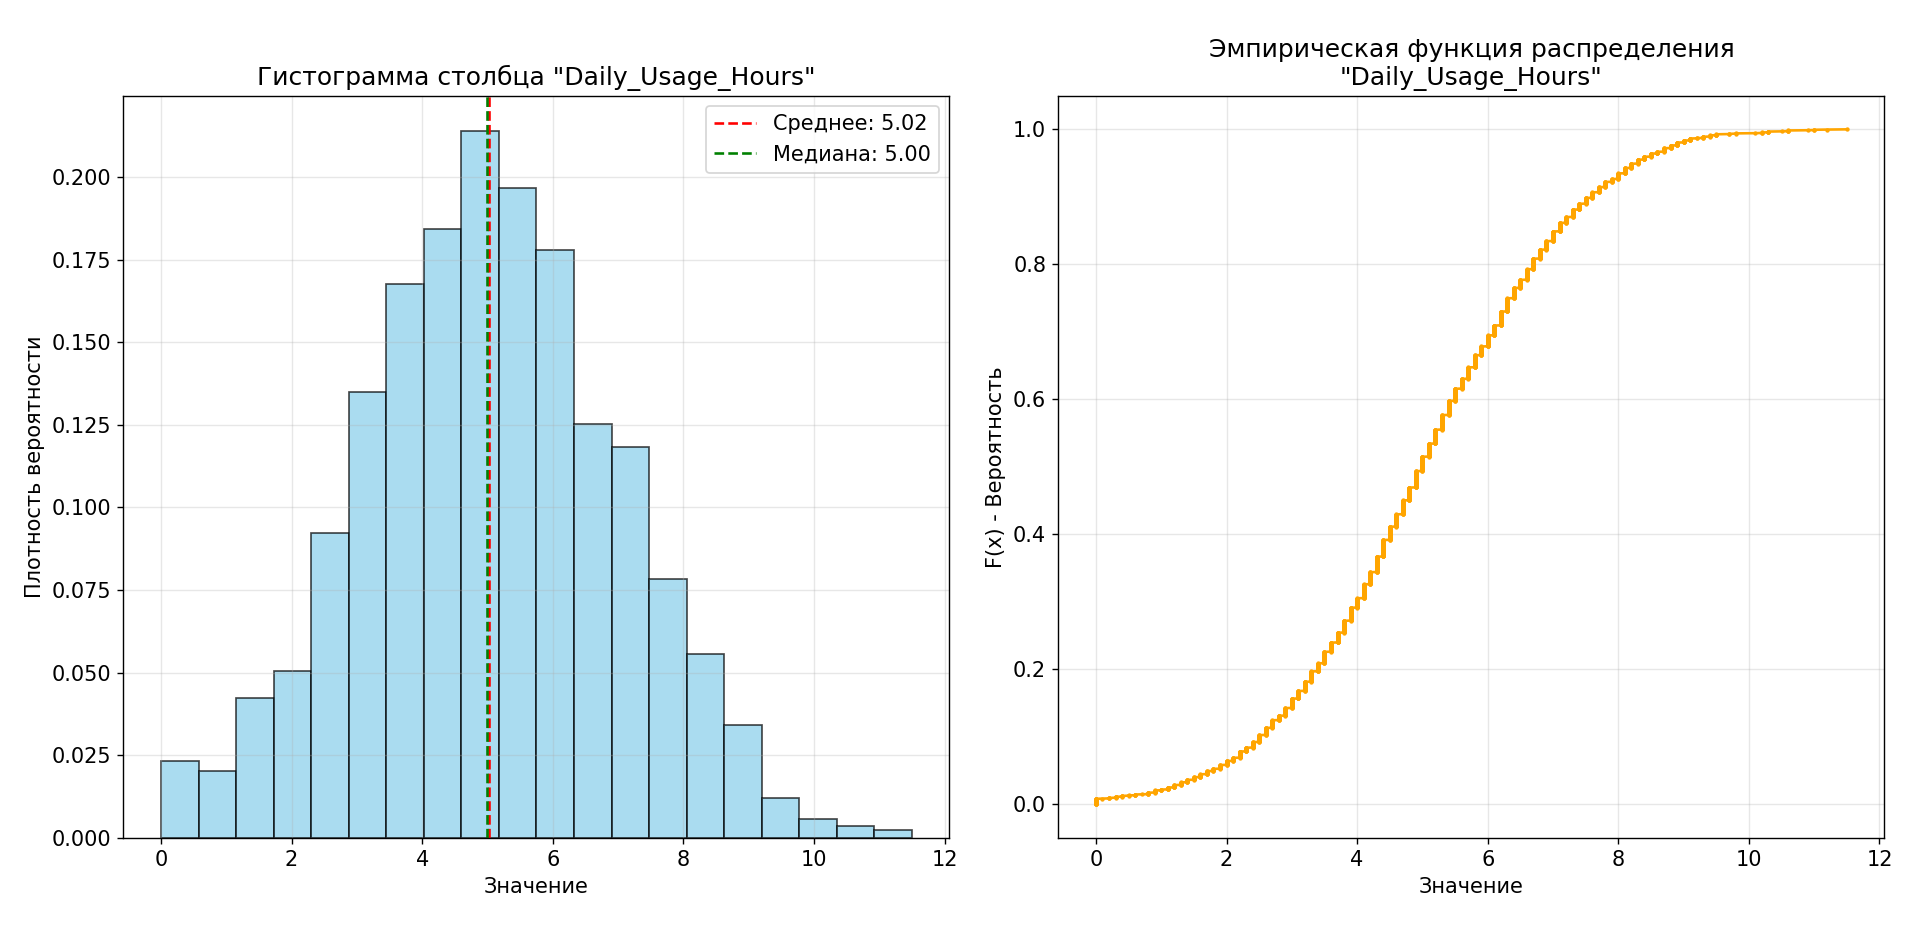  


## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

In [ ]:
# =============================================================================
# ЧАСТЬ II: ПРОВЕРКА НА НОРМАЛЬНОСТЬ
# =============================================================================

print("\n" + "=" * 60)
print("ЧАСТЬ II: ПРОВЕРКА НА НОРМАЛЬНОСТЬ")
print("=" * 60)

# 1. Критерий хи-квадрат (реализация вручную)
def chi_square_normality_test(data, alpha=0.05):
    """
    Реализация критерия хи-квадрат для проверки нормальности
    """
    # Оцениваем параметры нормального распределения
    mu = np.mean(data)
    sigma = np.std(data)
    
    # Создаем интервалы (используем правило Старджеса)
    k = int(1 + 3.322 * np.log10(len(data)))
    hist, bin_edges = np.histogram(data, bins=k, density=False)
    
    # Расчет ожидаемых частот
    expected_freq = []
    for i in range(len(bin_edges)-1):
        prob = norm.cdf(bin_edges[i+1], mu, sigma) - norm.cdf(bin_edges[i], mu, sigma)
        expected_freq.append(prob * len(data))
    
    # Объединяем интервалы с малыми ожидаемыми частотами
    expected_freq = np.array(expected_freq)
    hist = np.array(hist)
    
    # Удаляем интервалы с expected_freq < 5
    valid_indices = expected_freq >= 5
    hist = hist[valid_indices]
    expected_freq = expected_freq[valid_indices]
    
    # Статистика хи-квадрат
    chi2_stat = np.sum((hist - expected_freq)**2 / expected_freq)
    
    # Степени свободы
    df = len(hist) - 3  # k интервалов - 3 параметра (μ, σ, и оценка по данным)
    
    # Критическое значение
    critical_value = chi2.ppf(1 - alpha, df) if df > 0 else 0
    
    # P-value
    p_value = 1 - chi2.cdf(chi2_stat, df) if df > 0 else 1
    
    return chi2_stat, critical_value, p_value, p_value > alpha

# Применяем критерий хи-квадрат
chi2_stat, critical_value, p_value, is_normal_chi2 = chi_square_normality_test(data)
print("1. КРИТЕРИЙ ХИ-КВАДРАТ:")
print(f"   Статистика: {chi2_stat:.4f}")
print(f"   Критическое значение: {critical_value:.4f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Нормальное распределение: {'Да' if is_normal_chi2 else 'Нет'}")

# 2. Критерии асимметрии и эксцесса
skew_stat, skew_p = skewtest(data)
kurt_stat, kurt_p = kurtosistest(data)

print("\n2. КРИТЕРИЙ АСИММЕТРИИ:")
print(f"   Статистика: {skew_stat:.4f}, P-value: {skew_p:.4f}")
print(f"   Нормальное распределение: {'Да' if skew_p > 0.05 else 'Нет'}")

print("\n3. КРИТЕРИЙ ЭКСЦЕССА:")
print(f"   Статистика: {kurt_stat:.4f}, P-value: {kurt_p:.4f}")
print(f"   Нормальное распределение: {'Да' if kurt_p > 0.05 else 'Нет'}")

# 3. Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title(f'Q-Q plot для "{target_column}"')
plt.grid(True, alpha=0.3)
plt.show()

# ВЫВОДЫ по части II
print("\n" + "-" * 40)
print("ВЫВОДЫ ПО ЧАСТИ II:")
print("-" * 40)
is_normal = is_normal_chi2 and skew_p > 0.05 and kurt_p > 0.05
print(f"1. Данные являются нормальными: {'Да' if is_normal else 'Нет'}")
print(f"2. Критерий хи-квадрат: {'нормальность' if is_normal_chi2 else 'отклонение от нормальности'}")
print(f"3. Критерий асимметрии: {'нормальность' if skew_p > 0.05 else 'асимметрия значима'}")
print(f"4. Критерий эксцесса: {'нормальность' if kurt_p > 0.05 else 'эксцесс значим'}")
print("5. Q-Q plot показывает отклонение точек от прямой линии, что указывает на отклонение от нормальности")

1. КРИТЕРИЙ ХИ-КВАДРАТ:  
   Статистика: 23.2103  
   Критическое значение: 16.9190  
   P-value: 0.0057  
   Нормальное распределение: Нет  

2. КРИТЕРИЙ АСИММЕТРИИ:  
   Статистика: 0.3631, P-value: 0.7166  
   Нормальное распределение: Да  

3. КРИТЕРИЙ ЭКСЦЕССА:  
   Статистика: -1.3990, P-value: 0.1618  
   Нормальное распределение: Да  

----------------------------------------  
ВЫВОДЫ ПО ЧАСТИ II:  
----------------------------------------  
1. Данные являются нормальными: Нет  
2. Критерий хи-квадрат: отклонение от нормальности  
3. Критерий асимметрии: нормальность  
4. Критерий эксцесса: нормальность  
5. Q-Q plot показывает отклонение точек от прямой линии, что указывает на отклонение от нормальности  

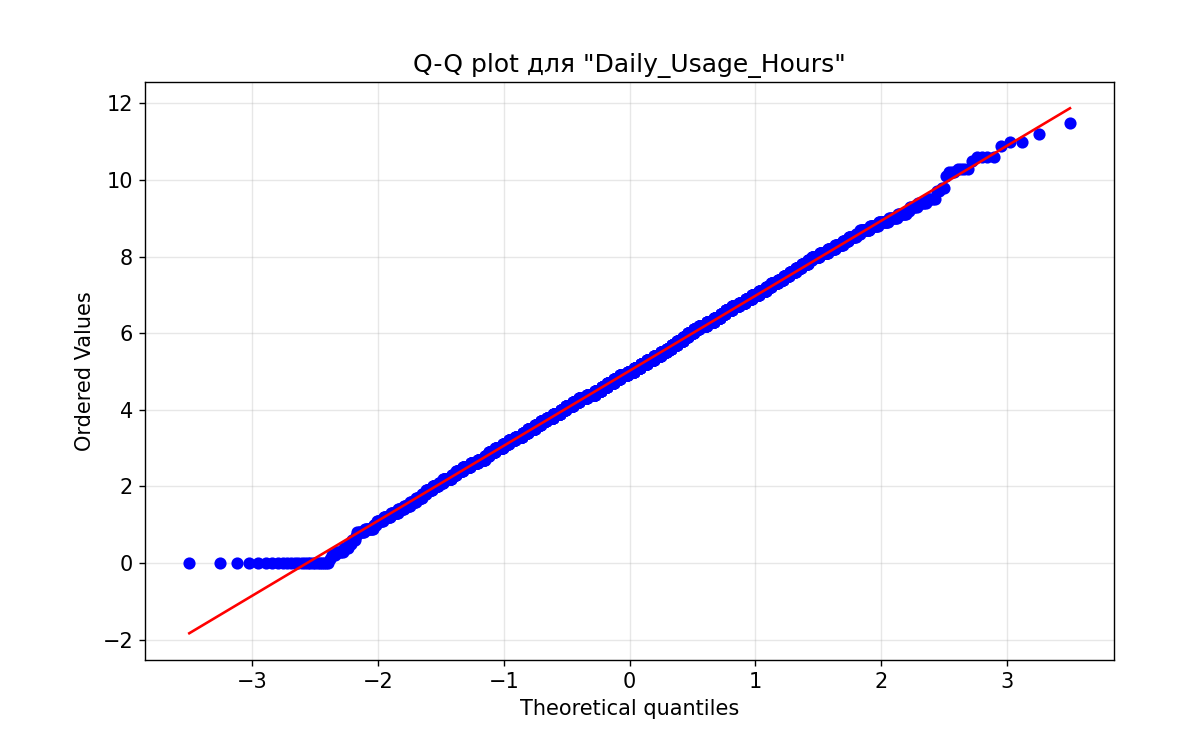



## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

In [ ]:
# =============================================================================
# ЧАСТЬ III: ОБРАБОТКА ДАННЫХ ДЛЯ НОРМАЛИЗАЦИИ
# =============================================================================

print("\n" + "=" * 60)
print("ЧАСТЬ III: ОБРАБОТКА ДАННЫХ ДЛЯ НОРМАЛИЗАЦИИ")
print("=" * 60)

def process_data(data):
    """
    Обработка данных для нормализации распределения
    """
    print(f"Исходный размер данных: {len(data)}")
    
    # 1. Удаление выбросов по методу IQR
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    print(f"После удаления выбросов: {len(filtered_data)}")
    
    # 2. Логарифмическое преобразование (если данные положительные)
    if filtered_data.min() > 0:
        transformed_data = np.log1p(filtered_data)  # log(1 + x) для стабильности
        print("Применено логарифмическое преобразование")
    else:
        # Сдвиг для отрицательных значений
        shift = abs(filtered_data.min()) + 0.1
        transformed_data = np.log(filtered_data + shift)
        print(f"Применено логарифмическое преобразование со сдвигом {shift:.2f}")
    
    # 3. Стандартизация
    standardized_data = (transformed_data - np.mean(transformed_data)) / np.std(transformed_data)
    print("Применена стандартизация")
    
    return standardized_data

# Применяем обработку
processed_data = process_data(data)

# Повторяем анализ для обработанных данных (Часть I)
print(f"\nАНАЛИЗ ОБРАБОТАННЫХ ДАННЫХ:")
print(f"Размер после обработки: {len(processed_data)}")

# Характеристики обработанных данных
processed_char = {
    "Среднее": np.mean(processed_data),
    "Дисперсия": np.var(processed_data, ddof=0),
    "Мода": stats.mode(processed_data, keepdims=True).mode[0],
    "Медиана": np.median(processed_data),
    "Квантиль 0.25": np.quantile(processed_data, 0.25),
    "Квантиль 0.5": np.quantile(processed_data, 0.5),
    "Квантиль 0.75": np.quantile(processed_data, 0.75),
    "Эксцесс": stats.kurtosis(processed_data),
    "Асимметрия": stats.skew(processed_data),
    "Интерквартильный размах": np.quantile(processed_data, 0.75) - np.quantile(processed_data, 0.25)
}

print("\nХАРАКТЕРИСТИКИ ОБРАБОТАННЫХ ДАННЫХ:")
for key, value in processed_char.items():
    print(f"{key}: {value:.4f}")

# Графики для обработанных данных
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма
ax1.hist(processed_data, bins=20, density=True, alpha=0.7, edgecolor='black', color='lightgreen')
ax1.axvline(processed_char["Среднее"], color='red', linestyle='--', 
           label=f'Среднее: {processed_char["Среднее"]:.2f}')
ax1.axvline(processed_char["Медиана"], color='green', linestyle='--', 
           label=f'Медиана: {processed_char["Медиана"]:.2f}')
ax1.set_title(f'Гистограмма обработанных данных\n"{target_column}"')
ax1.set_xlabel('Значение')
ax1.set_ylabel('Плотность вероятности')
ax1.legend()
ax1.grid(True, alpha=0.3)

# EDF
sorted_processed = np.sort(processed_data)
y_processed = np.arange(1, len(sorted_processed) + 1) / len(sorted_processed)
ax2.plot(sorted_processed, y_processed, marker='.', linestyle='-', markersize=3, color='purple')
ax2.set_title(f'EDF обработанных данных\n"{target_column}"')
ax2.set_xlabel('Значение')
ax2.set_ylabel('F(x) - Вероятность')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Проверка на нормальность для обработанных данных (Часть II)
chi2_stat_proc, critical_value_proc, p_value_proc, is_normal_chi2_proc = chi_square_normality_test(processed_data)
skew_stat_proc, skew_p_proc = skewtest(processed_data)
kurt_stat_proc, kurt_p_proc = kurtosistest(processed_data)

print("\nПРОВЕРКА НА НОРМАЛЬНОСТЬ ДЛЯ ОБРАБОТАННЫХ ДАННЫХ:")
print(f"Критерий хи-квадрат: p-value = {p_value_proc:.4f}, нормальность: {'Да' if is_normal_chi2_proc else 'Нет'}")
print(f"Критерий асимметрии: p-value = {skew_p_proc:.4f}, нормальность: {'Да' if skew_p_proc > 0.05 else 'Нет'}")
print(f"Критерий эксцесса: p-value = {kurt_p_proc:.4f}, нормальность: {'Да' if kurt_p_proc > 0.05 else 'Нет'}")

# Q-Q plot для обработанных данных
plt.figure(figsize=(10, 6))
stats.probplot(processed_data, dist="norm", plot=plt)
plt.title(f'Q-Q plot для обработанных данных\n"{target_column}"')
plt.grid(True, alpha=0.3)
plt.show()

# ВЫВОДЫ по части III
print("\n" + "-" * 40)
print("ВЫВОДЫ ПО ЧАСТИ III:")
print("-" * 40)
is_normal_proc = is_normal_chi2_proc and skew_p_proc > 0.05 and kurt_p_proc > 0.05
print(f"1. Эффект от обработки данных: {'успешная нормализация' if is_normal_proc else 'частичная нормализация'}")
print(f"2. Изменение асимметрии: {characteristics['Асимметрия']:.2f} → {processed_char['Асимметрия']:.2f}")
print(f"3. Изменение эксцесса: {characteristics['Эксцесс']:.2f} → {processed_char['Эксцесс']:.2f}")
print("4. Обработка включала: удаление выбросов, логарифмирование, стандартизацию")

Исходный размер данных: 3000  
После удаления выбросов: 2990  
Применено логарифмическое преобразование со сдвигом 0.10  
Применена стандартизация  

АНАЛИЗ ОБРАБОТАННЫХ ДАННЫХ:  
Размер после обработки: 2990  

ХАРАКТЕРИСТИКИ ОБРАБОТАННЫХ ДАННЫХ:  
Среднее: -0.0000  
Дисперсия: 1.0000  
Мода: -0.0261  
Медиана: 0.1908  
Квантиль 0.25: -0.3190  
Квантиль 0.5: 0.1908  
Квантиль 0.75: 0.5842  
Эксцесс: 16.0573  
Асимметрия: -3.1348  
Интерквартильный размах: 0.9032  

ПРОВЕРКА НА НОРМАЛЬНОСТЬ ДЛЯ ОБРАБОТАННЫХ ДАННЫХ:  
Критерий хи-квадрат: p-value = 0.0000, нормальность: Нет  
Критерий асимметрии: p-value = 0.0000, нормальность: Нет  
Критерий эксцесса: p-value = 0.0000, нормальность: Нет  

----------------------------------------  
ВЫВОДЫ ПО ЧАСТИ III:  
----------------------------------------  
1. Эффект от обработки данных: частичная нормализация  
2. Изменение асимметрии: 0.02 → -3.13  
3. Изменение эксцесса: -0.12 → 16.06  
4. Обработка включала: удаление выбросов, логарифмирование, стандартизацию  

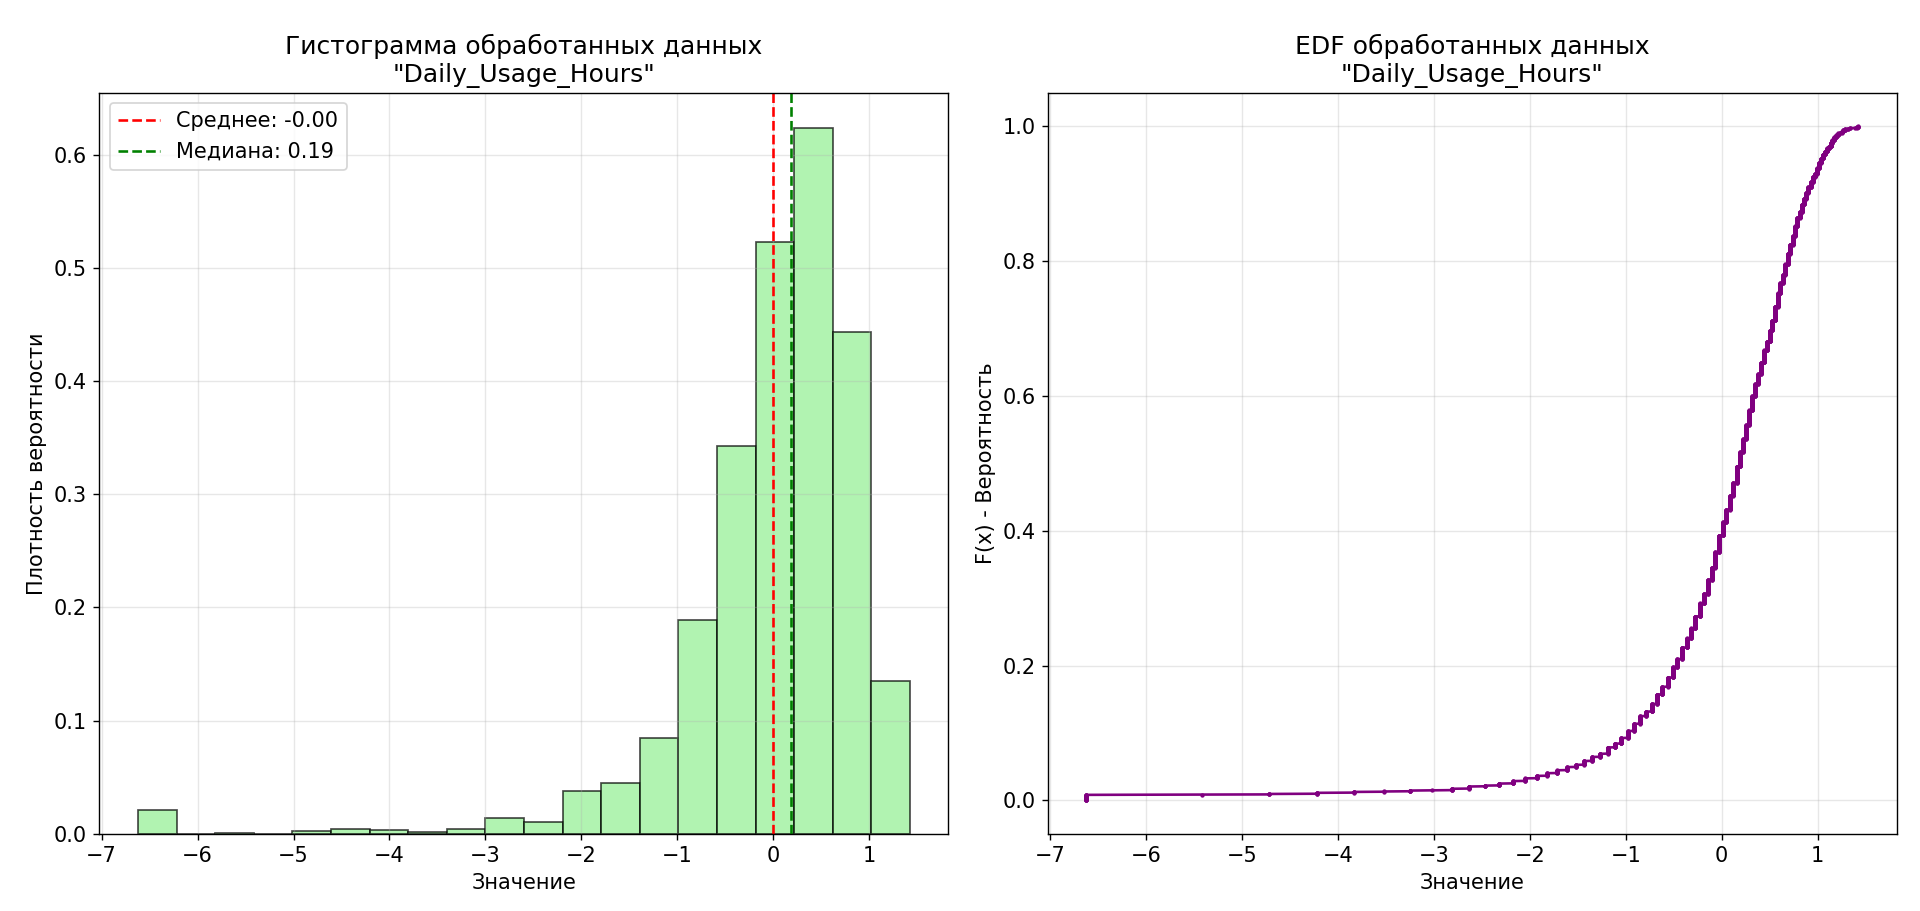

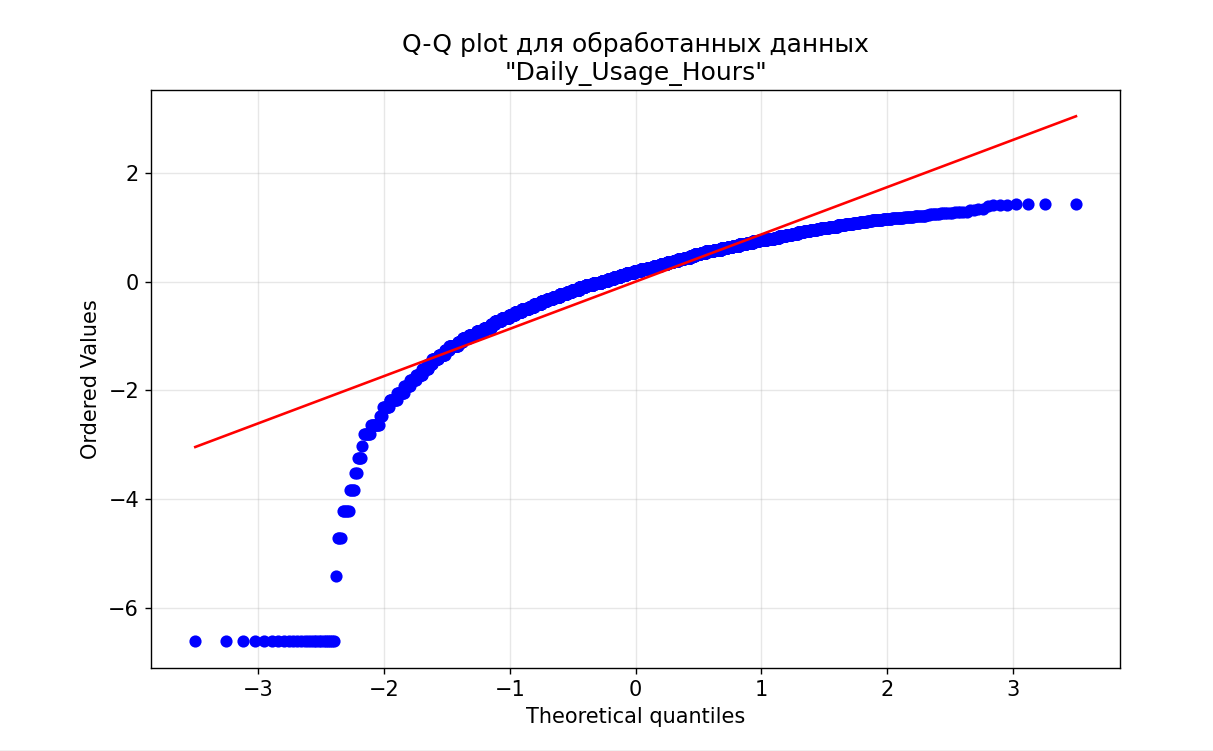


## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

In [ ]:
# =============================================================================
# ЧАСТЬ IV: АНАЛИЗ ПО ГРУППАМ SCHOOL_GRADE
# =============================================================================

print("\n" + "=" * 60)
print("ЧАСТЬ IV: АНАЛИЗ ПО ГРУППАМ SCHOOL_GRADE")
print("=" * 60)

# Проверяем наличие столбца School_Grade
if 'School_Grade' in df.columns:
    # Группировка по School_Grade
    grouped = df.groupby('School_Grade')[target_column]
    
    print("Уникальные значения School_Grade:", df['School_Grade'].unique())
    print("Количество записей по классам:")
    print(df['School_Grade'].value_counts())
    
    # Гистограммы для каждой группы
    grades = sorted(df['School_Grade'].unique())
    n_grades = len(grades)
    
    fig, axes = plt.subplots(1, n_grades, figsize=(5*n_grades, 5), sharey=True)
    if n_grades == 1:
        axes = [axes]
    
    for i, grade in enumerate(grades):
        group_data = df[df['School_Grade'] == grade][target_column].dropna()
        axes[i].hist(group_data, bins=15, alpha=0.7, edgecolor='black', color=f'C{i}')
        axes[i].set_title(f'Класс {grade} (n={len(group_data)})')
        axes[i].set_xlabel(target_column)
        axes[i].grid(True, alpha=0.3)
    
    axes[0].set_ylabel('Частота')
    plt.suptitle(f'Распределение "{target_column}" по школьным классам', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Статистики по группам
    group_stats = []
    for grade in grades:
        group_data = df[df['School_Grade'] == grade][target_column].dropna()
        if len(group_data) > 0:
            stats_dict = {
                'Grade': grade,
                'Count': len(group_data),
                'Mean': np.mean(group_data),
                'Variance': np.var(group_data, ddof=0),
                'Std': np.std(group_data),
                'Skewness': stats.skew(group_data),
                'Kurtosis': stats.kurtosis(group_data)
            }
            group_stats.append(stats_dict)
    
    stats_df = pd.DataFrame(group_stats)
    print("\nСТАТИСТИКИ ПО ГРУППАМ:")
    print(stats_df.to_string(index=False))
    
    # Проверка статистической значимости различий между группами
    if len(grades) > 1:
        group_data_list = [df[df['School_Grade'] == grade][target_column].dropna() 
                          for grade in grades if len(df[df['School_Grade'] == grade][target_column].dropna()) > 0]
        
        if len(group_data_list) >= 2:
            # ANOVA test
            f_stat, p_value_anova = stats.f_oneway(*group_data_list)
            print(f"\nANOVA test: F = {f_stat:.3f}, p = {p_value_anova:.4f}")
            
            if p_value_anova < 0.05:
                print("✓ Обнаружены статистически значимые различия между группами (p < 0.05)")
            else:
                print("✗ Статистически значимых различий между группами не обнаружено")
else:
    print("Столбец 'School_Grade' не найден в данных")
    grades = []

# ВЫВОДЫ по части IV
print("\n" + "-" * 40)
print("ВЫВОДЫ ПО ЧАСТИ IV:")
print("-" * 40)
if 'School_Grade' in df.columns and len(grades) > 0:
    print("1. РАСПРЕДЕЛЕНИЯ ПО ГРУППАМ:")
    for _, row in stats_df.iterrows():
        print(f"   Класс {row['Grade']}: среднее = {row['Mean']:.2f} ± {row['Std']:.2f}")
    
    print("2. РАЗЛИЧИЯ МЕЖДУ ГРУППАМИ:")
    if len(grades) > 1 and 'p_value_anova' in locals():
        if p_value_anova < 0.05:
            print("   Обнаружены статистически значимые различия между классами")
            # Поиск максимальной и минимальной средней
            max_mean = stats_df.loc[stats_df['Mean'].idxmax()]
            min_mean = stats_df.loc[stats_df['Mean'].idxmin()]
            print(f"   Наибольшее среднее: класс {max_mean['Grade']} ({max_mean['Mean']:.2f})")
            print(f"   Наименьшее среднее: класс {min_mean['Grade']} ({min_mean['Mean']:.2f})")
        else:
            print("   Статистически значимых различий между классами не обнаружено")
else:
    print("Анализ по группам невозможен - отсутствует столбец School_Grade")

Уникальные значения School_Grade: ['9th' '7th' '11th' '12th' '10th' '8th']  
Количество записей по классам:  
School_Grade  
12th    529  
9th     526  
7th     497  
10th    487  
8th     482  
11th    479  
Name: count, dtype: int64  

СТАТИСТИКИ ПО ГРУППАМ:  
Grade   Count     Mean    Variance Std       Skewness  Kurtosis  
 10th    487    4.977618  3.804776 1.950584  0.152521 -0.042678  
 11th    479    5.061795  3.627622 1.904632 -0.211810  0.010015  
 12th    529    4.936862  3.728528 1.930940 -0.029841 -0.014586  
  7th    497    5.077062  3.875530 1.968637  0.050672 -0.225609  
  8th    482    5.066390  4.001194 2.000298  0.060399 -0.087491  
  9th    526    5.012167  3.905213 1.976161  0.045551 -0.338839  

ANOVA test: F = 0.420, p = 0.8348  
✗ Статистически значимых различий между группами не обнаружено  

----------------------------------------  
ВЫВОДЫ ПО ЧАСТИ IV:  
----------------------------------------  
1. РАСПРЕДЕЛЕНИЯ ПО ГРУППАМ:  
   Класс 10th: среднее = 4.98 ± 1.95  
   Класс 11th: среднее = 5.06 ± 1.90  
   Класс 12th: среднее = 4.94 ± 1.93  
   Класс 7th: среднее = 5.08 ± 1.97  
   Класс 8th: среднее = 5.07 ± 2.00  
   Класс 9th: среднее = 5.01 ± 1.98  
2. РАЗЛИЧИЯ МЕЖДУ ГРУППАМИ:  
   Статистически значимых различий между классами не обнаружено  
   
   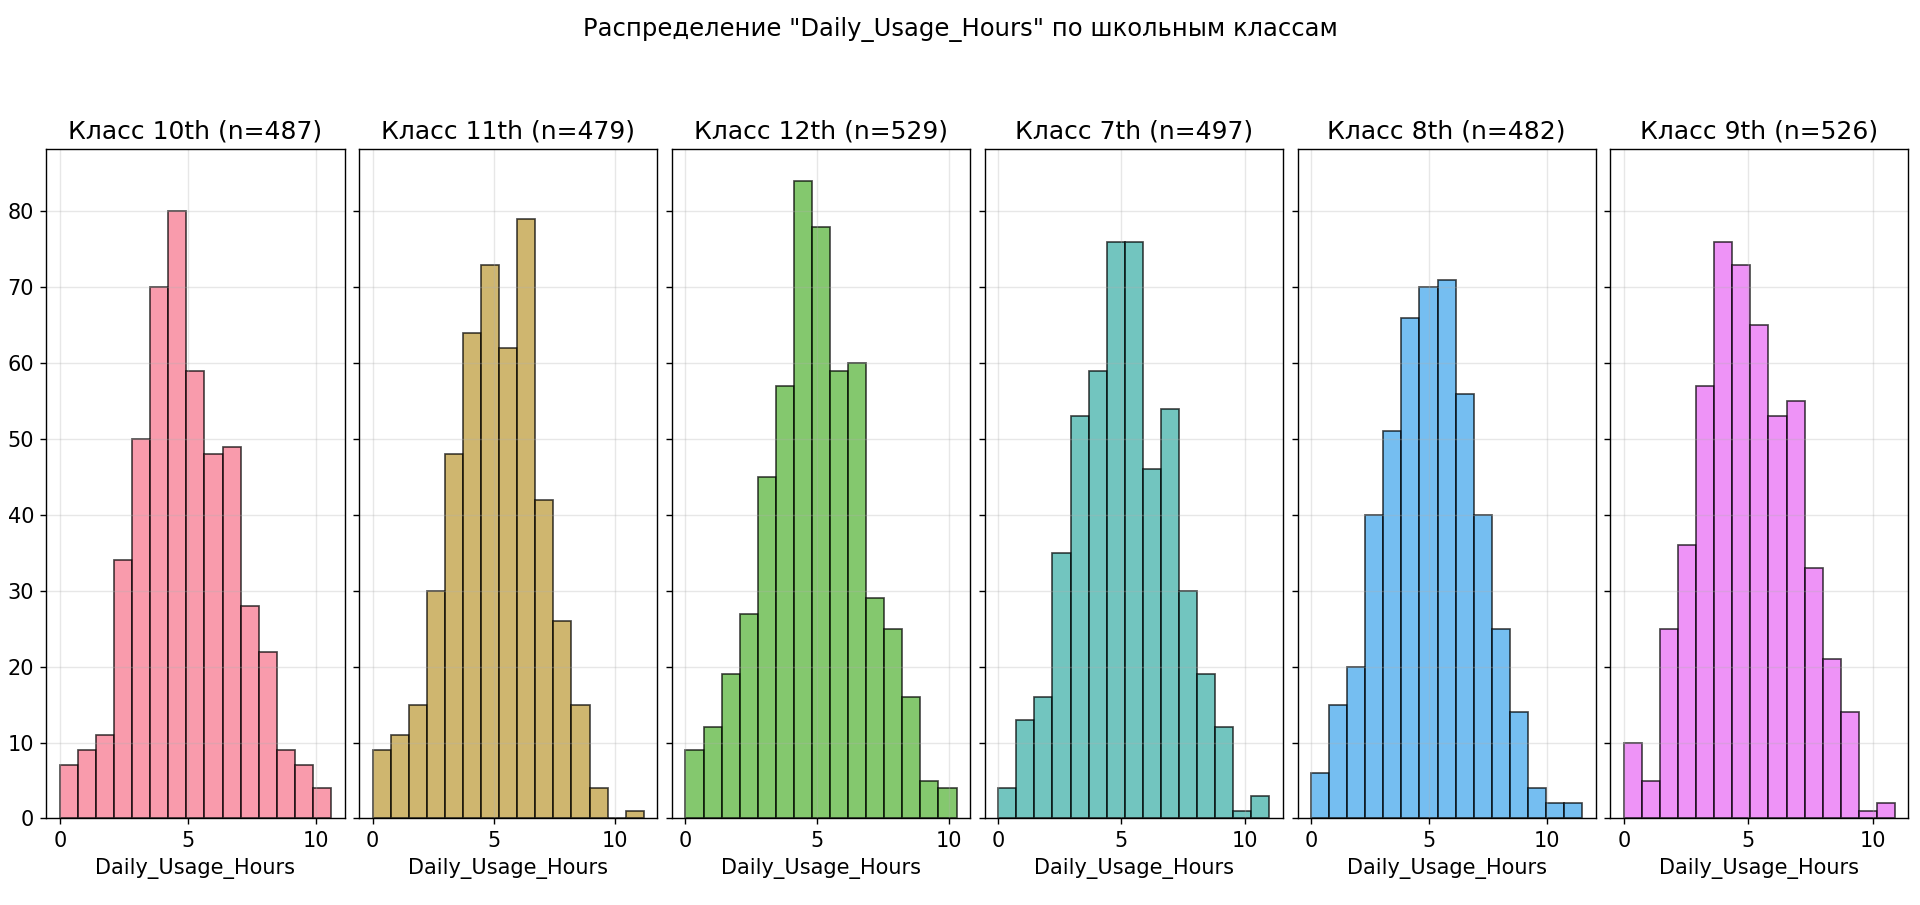


## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [ ]:
N = 0
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Daily_Usage_Hours'